<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/CLUSTER_KMEANS_MEDIUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PASOS A SEGUIR
# DETERMINAR EL NUMERO DE K, NORMALMENTE CON EL METODO DEL CODO
# ELEGIR LOS CENTROIDES.
# CALCULAR LA DISTANCIA ENTRE LOS PUNTOS Y LOS CENTROIDES. 
# CRITERIOS DE DETENCION. 
# https://medium.com/geekculture/why-do-initial-cluster-centroids-in-k-means-affect-the-final-cluster-generated-71c115141be8

In [4]:
# para manipulación de datos.
import pandas as pd
# calculos de algebra
import numpy as np
# para generar datos.
from sklearn.cluster import KMeans
# para datos visuales. 
import plotnine
from plotnine import *
# para numeros aleatorios.
import random
# para ignorar warnings
import warnings
warnings.filterwarnings("ignore")
# en este he importado make_blobs que significa hacer bloques.
from sklearn.datasets import make_blobs

In [5]:
# vamos a generar datos dummy. 
features, clusters = make_blobs(
    n_samples = 2000,
    n_features = 2,
    centers = 3,
    cluster_std = 0.8,
    shuffle = True,
    random_state = 9
)

In [6]:
# vamos a concatenar los arrays. 
array = np.column_stack([features, clusters])
array

array([[ -1.12165821,  -6.93867365,   1.        ],
       [-11.1996175 ,   0.1390546 ,   0.        ],
       [ -9.82051884,   0.17331046,   0.        ],
       ...,
       [  1.87317622,  -8.03479076,   1.        ],
       [ -6.33051068,  -6.01479745,   2.        ],
       [ -9.36028648,   0.28474266,   0.        ]])

In [7]:
# ahora de esto vamos a hacer un dataframe
df = pd.DataFrame(data = array,
                  columns= [
                            "Feature 1",
                            "Feature 2",
                            "Cluster"
                  ]
)
# ahora mostramos el dataframe. 

print("Dimension: {} rows and {} columns".format(
    len(df),
    len(df.columns))
)
df = df.astype({"Cluster": object})
df.head()

Dimension: 2000 rows and 3 columns


,Feature 1,Feature 2,Cluster
0,-1.121658,-6.938674,1.0
1,-11.199618,0.139055,0.0
2,-9.820519,0.173310,0.0
3,-10.481695,-0.809478,0.0
4,-7.200004,-7.886425,2.0


In [11]:
# Centroids
df_centroids = df.groupby(['Cluster']).mean().reset_index().rename(columns = {
    'Feature 1': 'Centroid Feature 1',
    'Feature 2': 'Centroid Feature 2'
    }
).astype({'Cluster': object})
df_centroids

,Cluster,Centroid Feature 1,Centroid Feature 2
0,0.0,-9.761820,0.059333
1,1.0,-0.099508,-7.355097
2,2.0,-7.193134,-5.640867


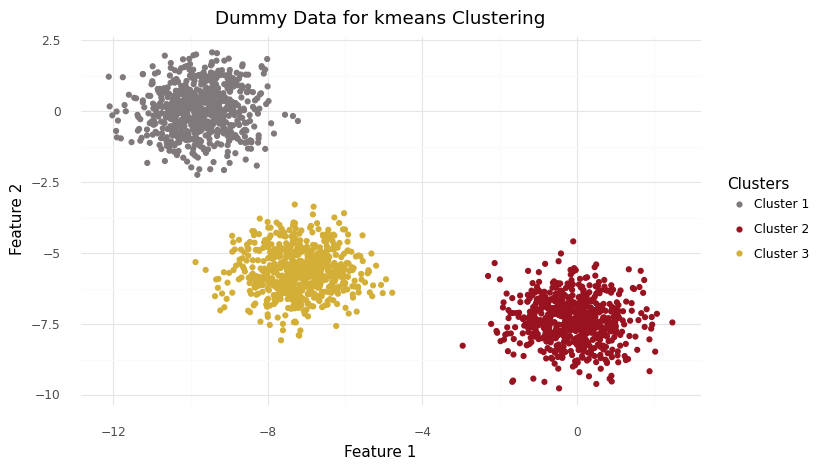

<ggplot: (8744743991233)>

In [12]:
# Scatterplot
plotnine.options.figure_size = (8, 4.8)
(
    ggplot()+
    geom_point(aes(x = 'Feature 1',
                   y = 'Feature 2',
                   color = 'Cluster'),
               data = df)+
    labs(title = 'Dummy Data for kmeans Clustering')+
    xlab('Feature 1')+
    ylab('Feature 2')+
    scale_color_manual(name = 'Clusters', 
                       values = [
                           '#80797c',
                           '#981220',
                           '#D4AF37'
                       ],
                       labels = [
                           'Cluster 1',
                           'Cluster 2',
                           'Cluster 3'
                       ]
                      )+
    theme_minimal()
)